In [103]:
library(dplyr)
library(ggplot2)
library(tibble)

options(scipen = 999)

Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"

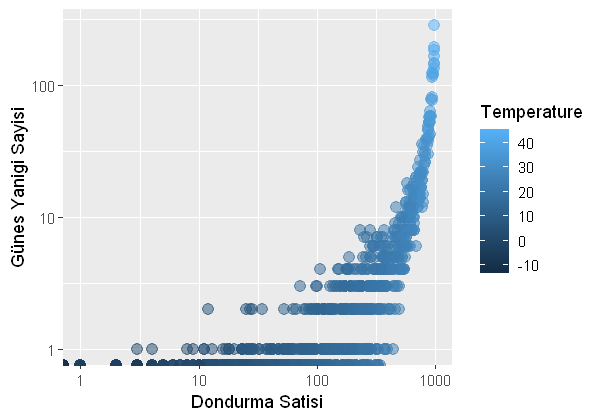

In [80]:
data <- read.csv('data.csv')

N <- 1000
options(repr.plot.width=5, repr.plot.height=3.5)
ggplot(data) + aes(x=icecream, y=sunspot, color=temp) + ylab('Günes Yanigi Sayisi') + xlab('Dondurma Satisi') + geom_point(alpha=0.5, size=3) + labs(color = "Temperature") + scale_x_continuous(trans = 'log10') + scale_y_continuous(trans = 'log10')


In [81]:
data <- data %>% mutate(icecream_ratio = icecream / N) %>% mutate(icecream_logit = log(icecream_ratio / (1-icecream_ratio ) + 0.000001)) # 0.0001 added to prevent log of 0

model <- glm(cbind(data$sunspot, N-data$sunspot)  ~ data$icecream_logit, family="binomial")
summary(model)


Call:
glm(formula = cbind(data$sunspot, N - data$sunspot) ~ data$icecream_logit, 
    family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6182  -0.8241  -0.3360   0.4099   3.4242  

Coefficients:
                     Estimate Std. Error z value            Pr(>|z|)    
(Intercept)         -5.004433   0.018174  -275.4 <0.0000000000000002 ***
data$icecream_logit  0.998627   0.008304   120.3 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 19484.59  on 999  degrees of freedom
Residual deviance:   980.99  on 998  degrees of freedom
AIC: 2790.6

Number of Fisher Scoring iterations: 5


Warning message:
"Transformation introduced infinite values in continuous y-axis"

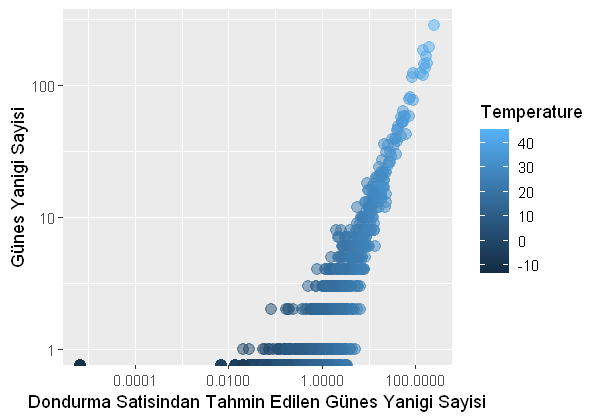

In [82]:
data$sunspot_predicted <-  model$fitted.values * N

options(repr.plot.width=5, repr.plot.height=3.5)
ggplot(data) + aes(x=sunspot_predicted, y=sunspot, color=temp) + xlab('Dondurma Satisindan Tahmin Edilen Günes Yanigi Sayisi') + ylab('Günes Yanigi Sayisi') + geom_point(alpha=0.5, size=3) + labs(color = "Temperature") + scale_x_continuous(trans = 'log10') + scale_y_continuous(trans = 'log10')


In [83]:
data$residuals <- data$sunspot - data$sunspot_predicted

tss <- sum((data$sunspot - mean(data$sunspot))^2)
rss <- sum(data$residuals^2)
rsq <- 1 - rss/tss

print(rsq)

[1] 0.9702435


Warning message:
"Removed 39 rows containing non-finite values (stat_ydensity)."

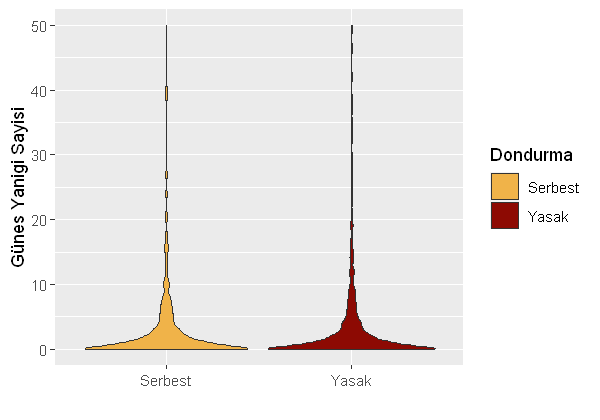

In [127]:
data_union <- union(read.csv('data.csv') %>% add_column(Dondurma="Serbest"), read.csv('data-without-icecream.csv') %>% add_column(Dondurma="Yasak"))

ggplot(data_union) + aes(x=Dondurma, y=sunspot, fill=Dondurma) + 
  geom_violin()    + scale_fill_manual(values=c("#F0B349", "#8d0a03")) + xlab("")  + ylab("Günes Yanigi Sayisi") + ylim(0, 50)


In [131]:
model <- aov(sunspot ~ Dondurma, data_union)
summary(model)

              Df Sum Sq Mean Sq F value Pr(>F)
Dondurma       1    591   590.8   1.278  0.258
Residuals   1998 923616   462.3               